In [29]:
import pandas as pd
import numpy as np
from sklearn.calibration import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import BaggingClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn import model_selection

In [3]:
df = pd.read_csv("Crop_recommendation.csv")
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [7]:
df.isnull().sum()


N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [9]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [40]:
#Finding the correlation of each columns with the label 


le = LabelEncoder()
df['label_encoded'] = le.fit_transform(df['label'])
df.drop('label', axis=1).corr()['label_encoded']

N               -0.031130
P               -0.491006
K               -0.346417
temperature      0.113606
humidity         0.193911
ph              -0.012253
rainfall         0.045611
label_encoded    1.000000
Name: label_encoded, dtype: float64

EXPLARATORY DATA ANALYSIS (EDA)

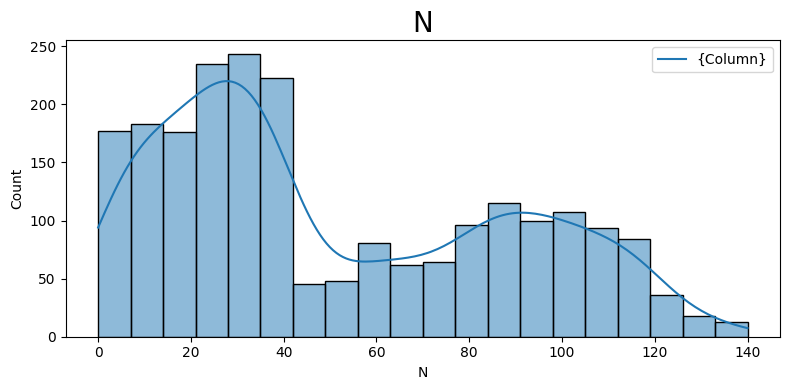

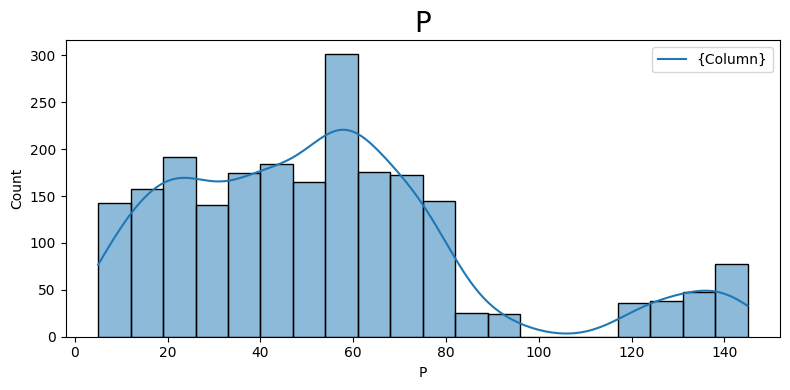

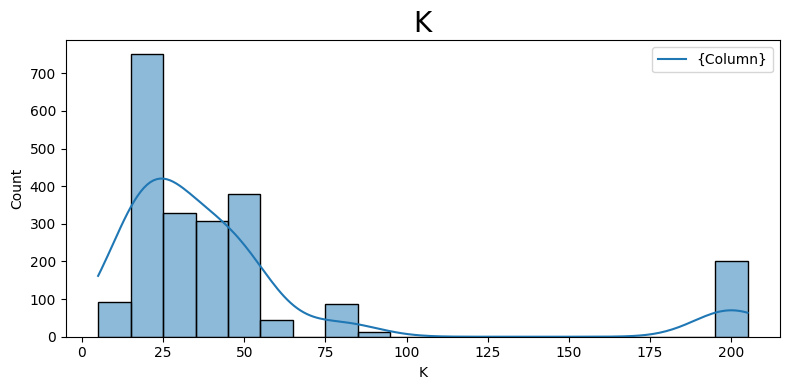

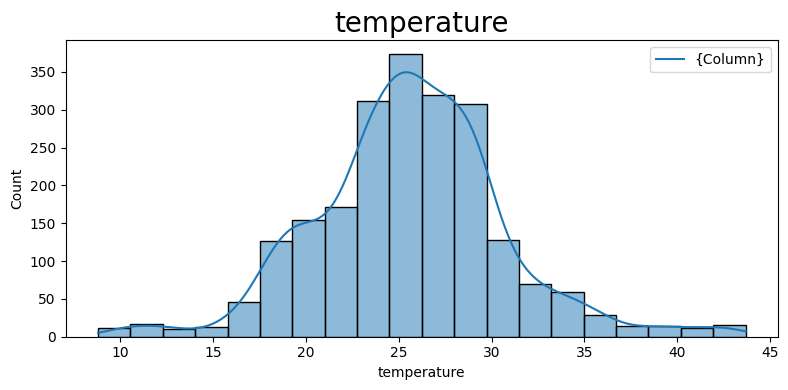

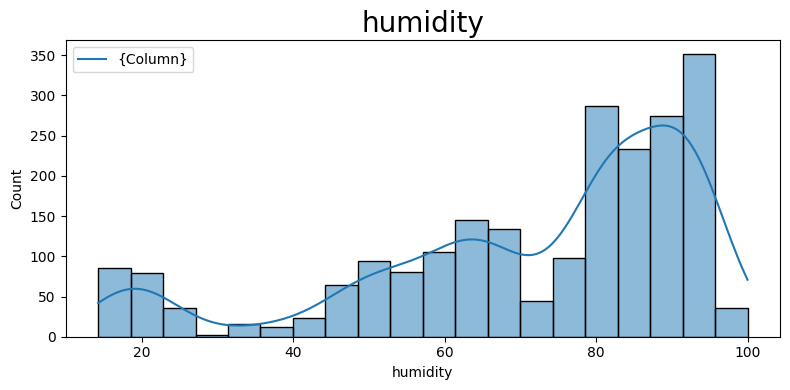

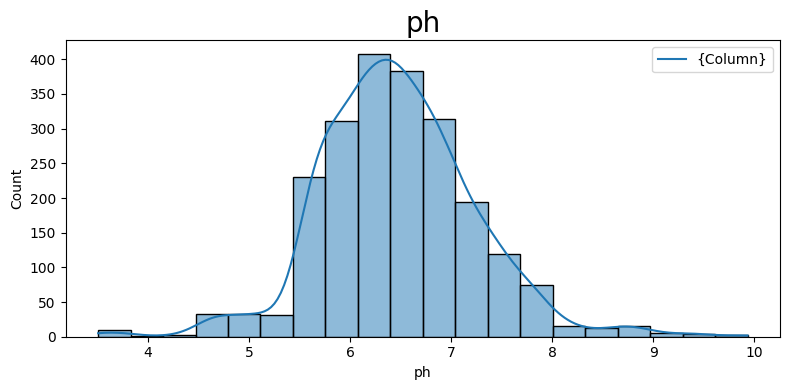

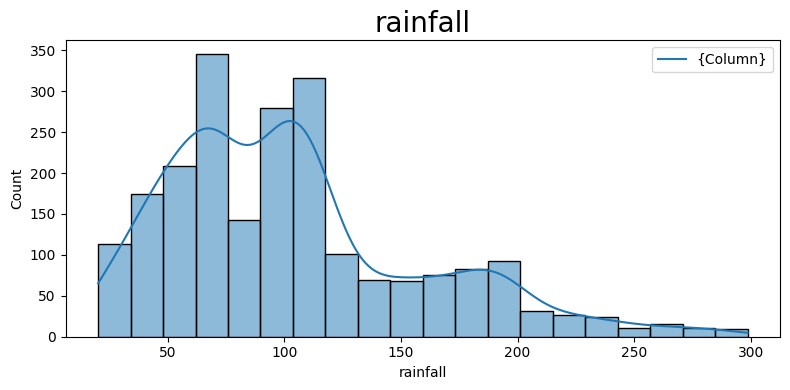

<Figure size 800x400 with 0 Axes>

In [65]:
for column in df.columns:
    plt.figure(figsize=(8, 4))
    if pd.api.types.is_numeric_dtype(df[column]):
        sns.histplot(x=df[column], bins=20, kde=True)
        plt.title(f"{column}", size=20)
        plt.legend(['{Column}'])
    plt.tight_layout() 


<Axes: xlabel='rainfall', ylabel='temperature'>

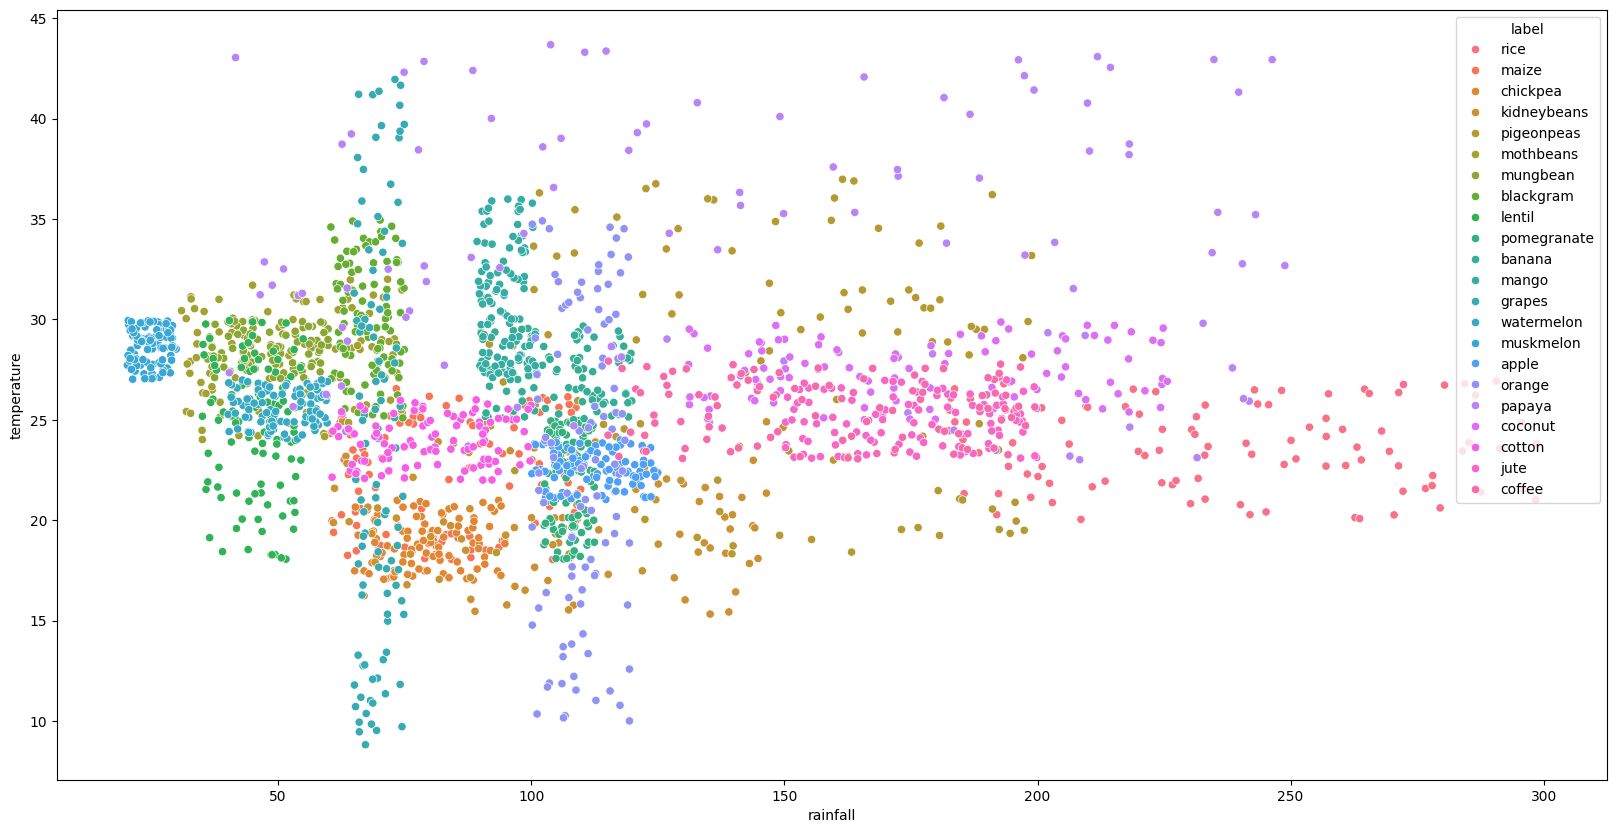

In [73]:
plt.figure(figsize=(20, 10))
sns.scatterplot(x='rainfall', y='temperature', data=df, hue='label')


OUTLIER DETECTION USING GRAPHS


In [8]:
#Unique values in the label column
crops = df['label'].unique()
print(len(crops))
print(crops)
print(pd.value_counts(df['label']))

22
['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']
label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64


/tmp/ipykernel_427833/3405447095.py:5: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  print(pd.value_counts(df['label']))


In [15]:
#Filtering each unique label and store it in a list df2 for to plot the box plot
df2=[]
for i in crops:
    df2.append(df[df['label'] == i])
df2[1].head()

,N,P,K,temperature,humidity,ph,rainfall,label
100,71,54,16,22.613600,63.690706,5.749914,87.759539,maize
101,61,44,17,26.100184,71.574769,6.931757,102.266244,maize
102,80,43,16,23.558821,71.593514,6.657965,66.719955,maize
103,73,58,21,19.972160,57.682729,6.596061,60.651715,maize
104,61,38,20,18.478913,62.695039,5.970458,65.438354,maize


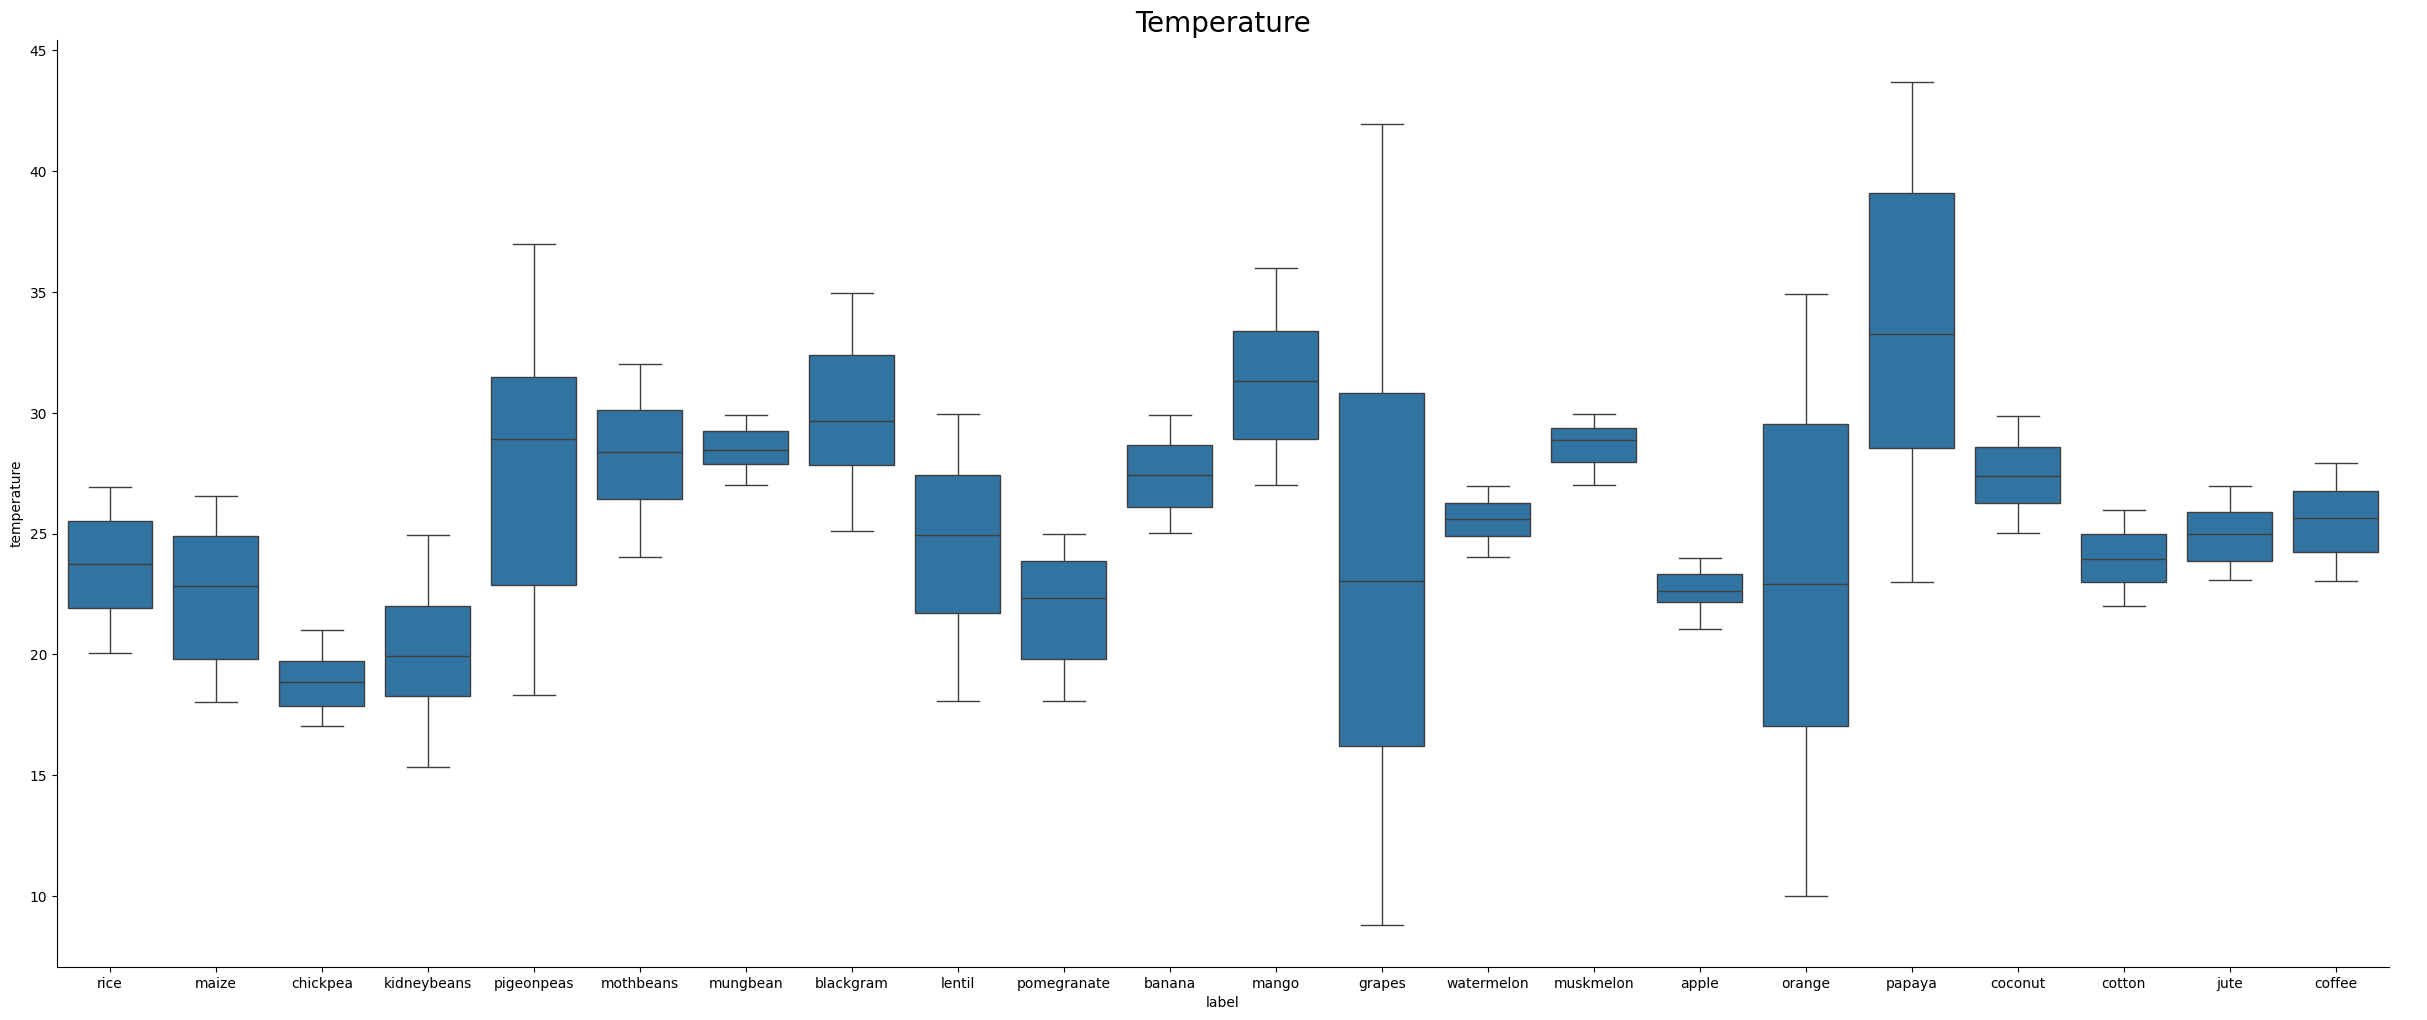

In [16]:
sns.catplot(data=df, x='label', y='temperature', kind='box', height=10, aspect=20/8.27)
# plt.xticks(rotation='vertical')
plt.title("Temperature", size=20)
plt.show()

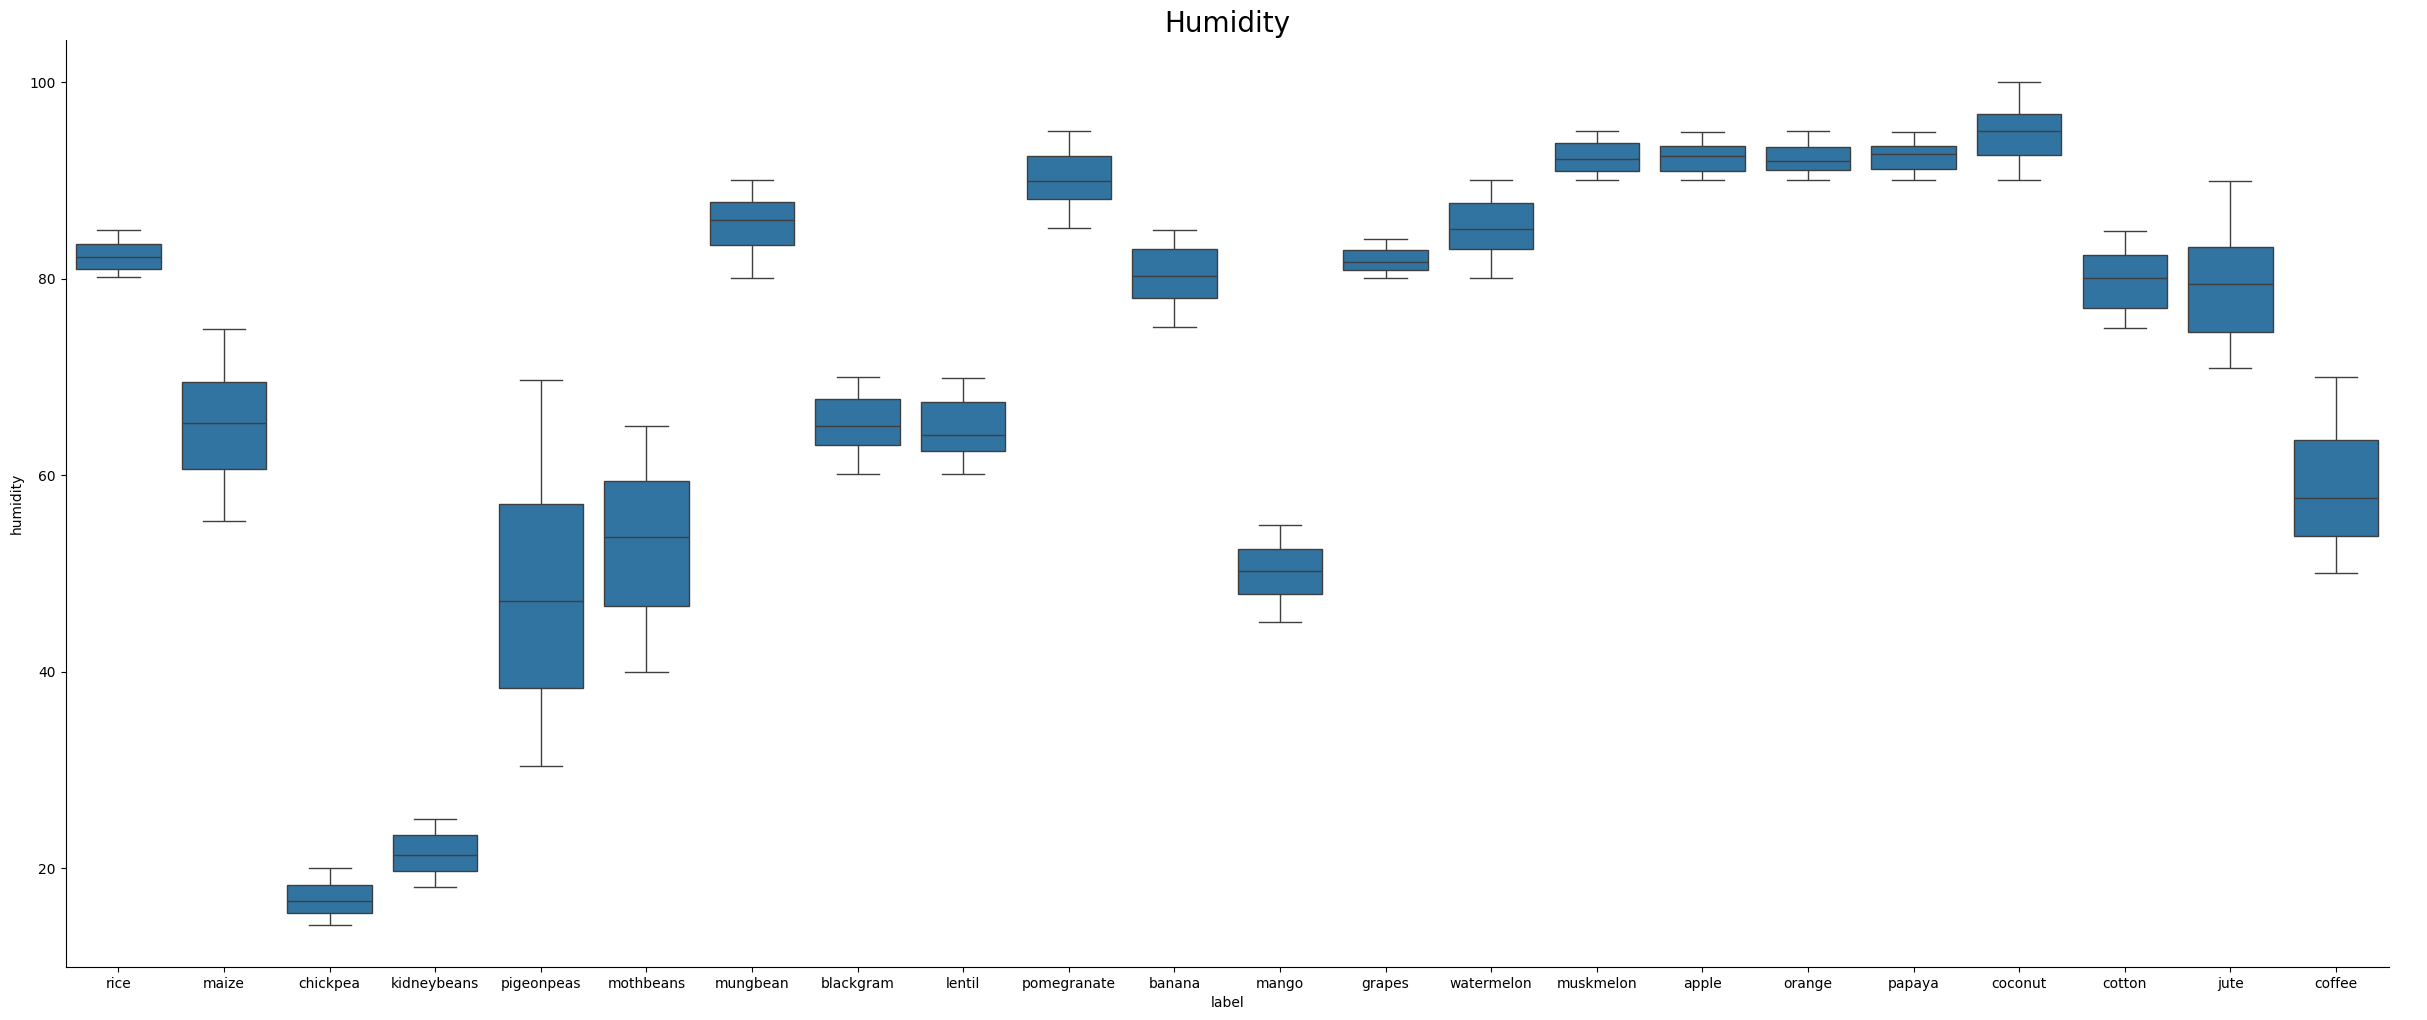

In [17]:
sns.catplot(data=df, x='label', y='humidity', kind='box', height=10, aspect=20/8.27)
# plt.xticks(rotation='vertical')
plt.title("Humidity", size=20)
plt.show()

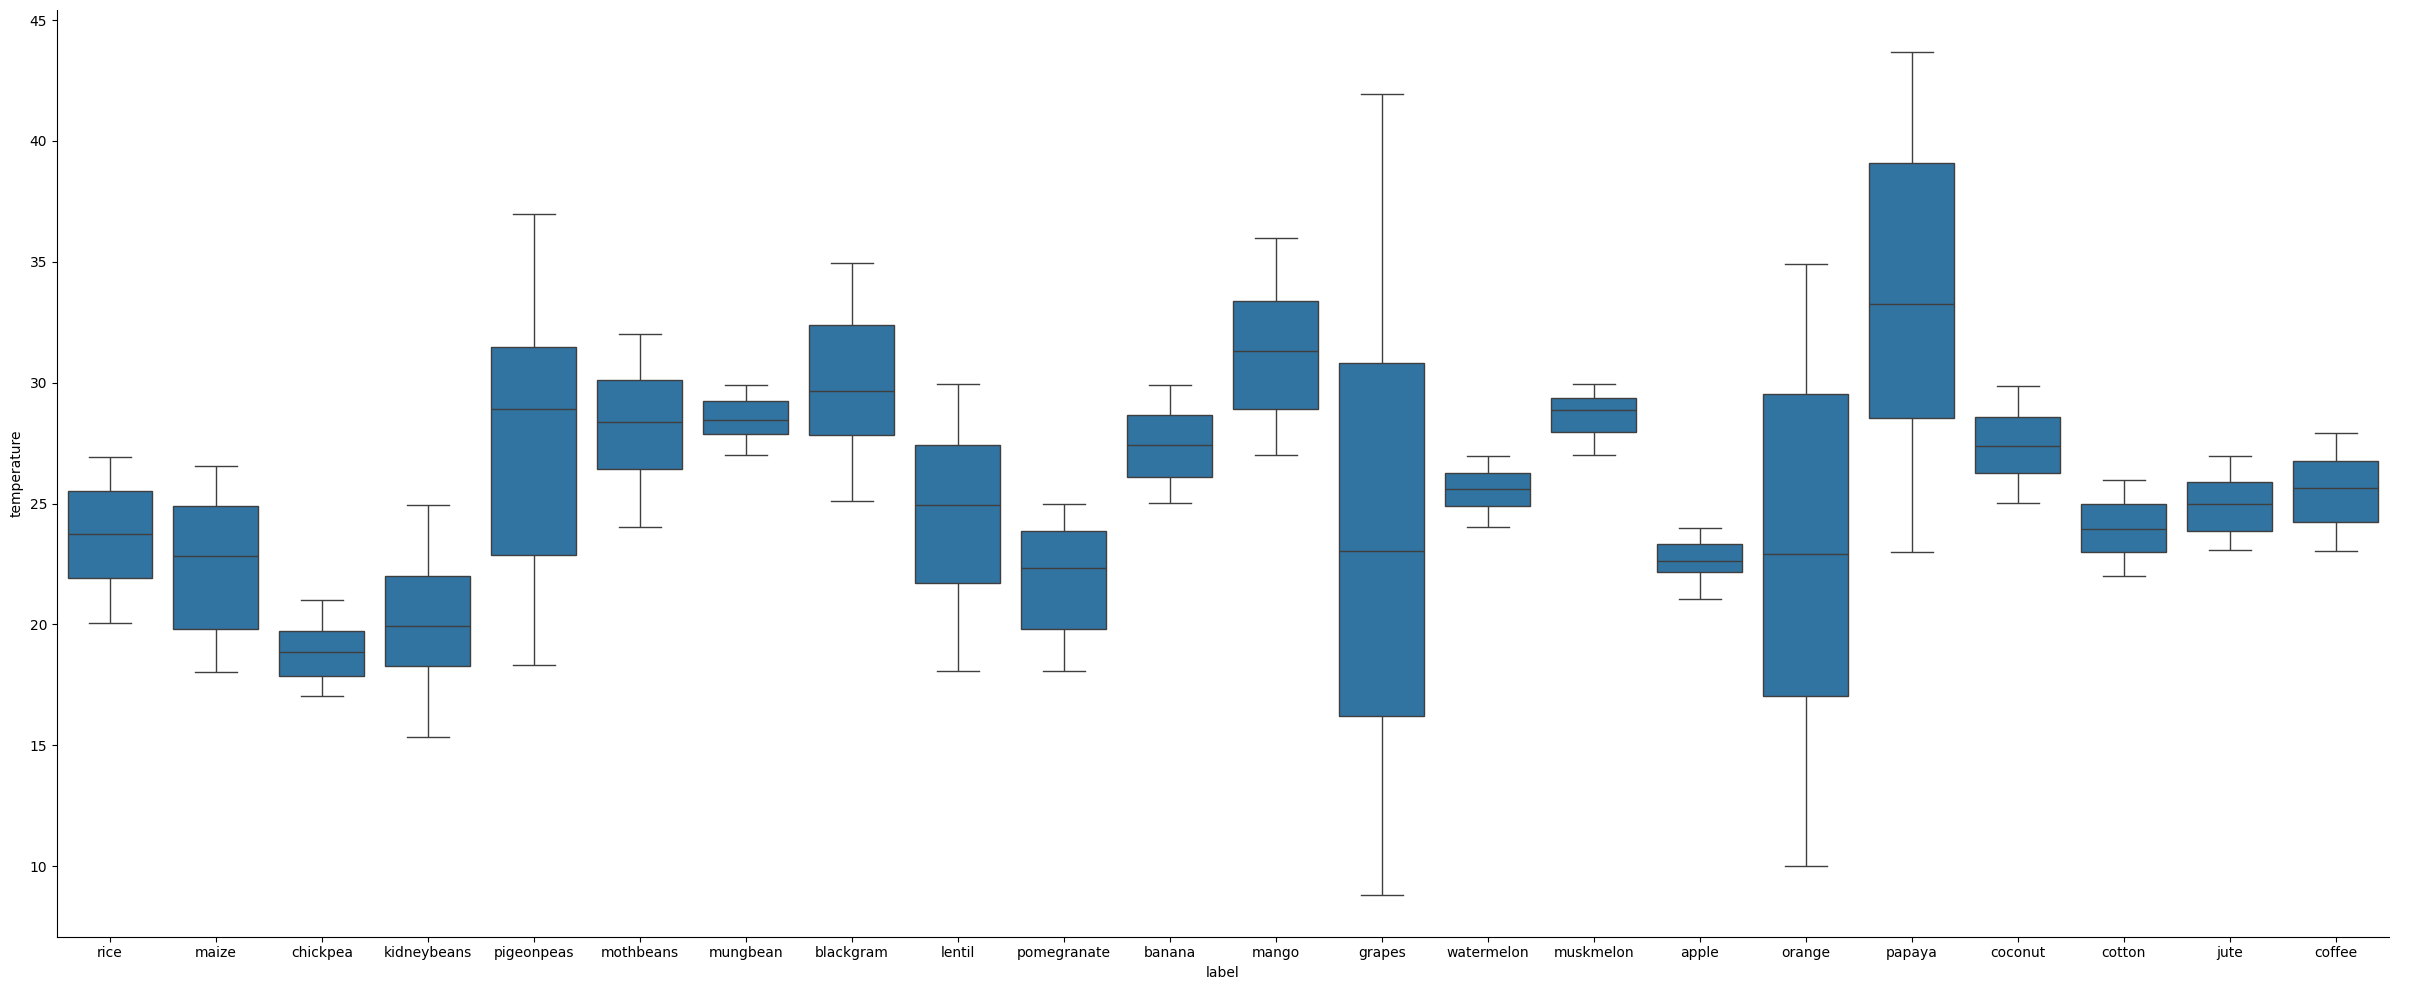

In [18]:
sns.catplot(data=df, x='label', y='temperature', kind='box', height=10, aspect=20/8.27)
plt.show()


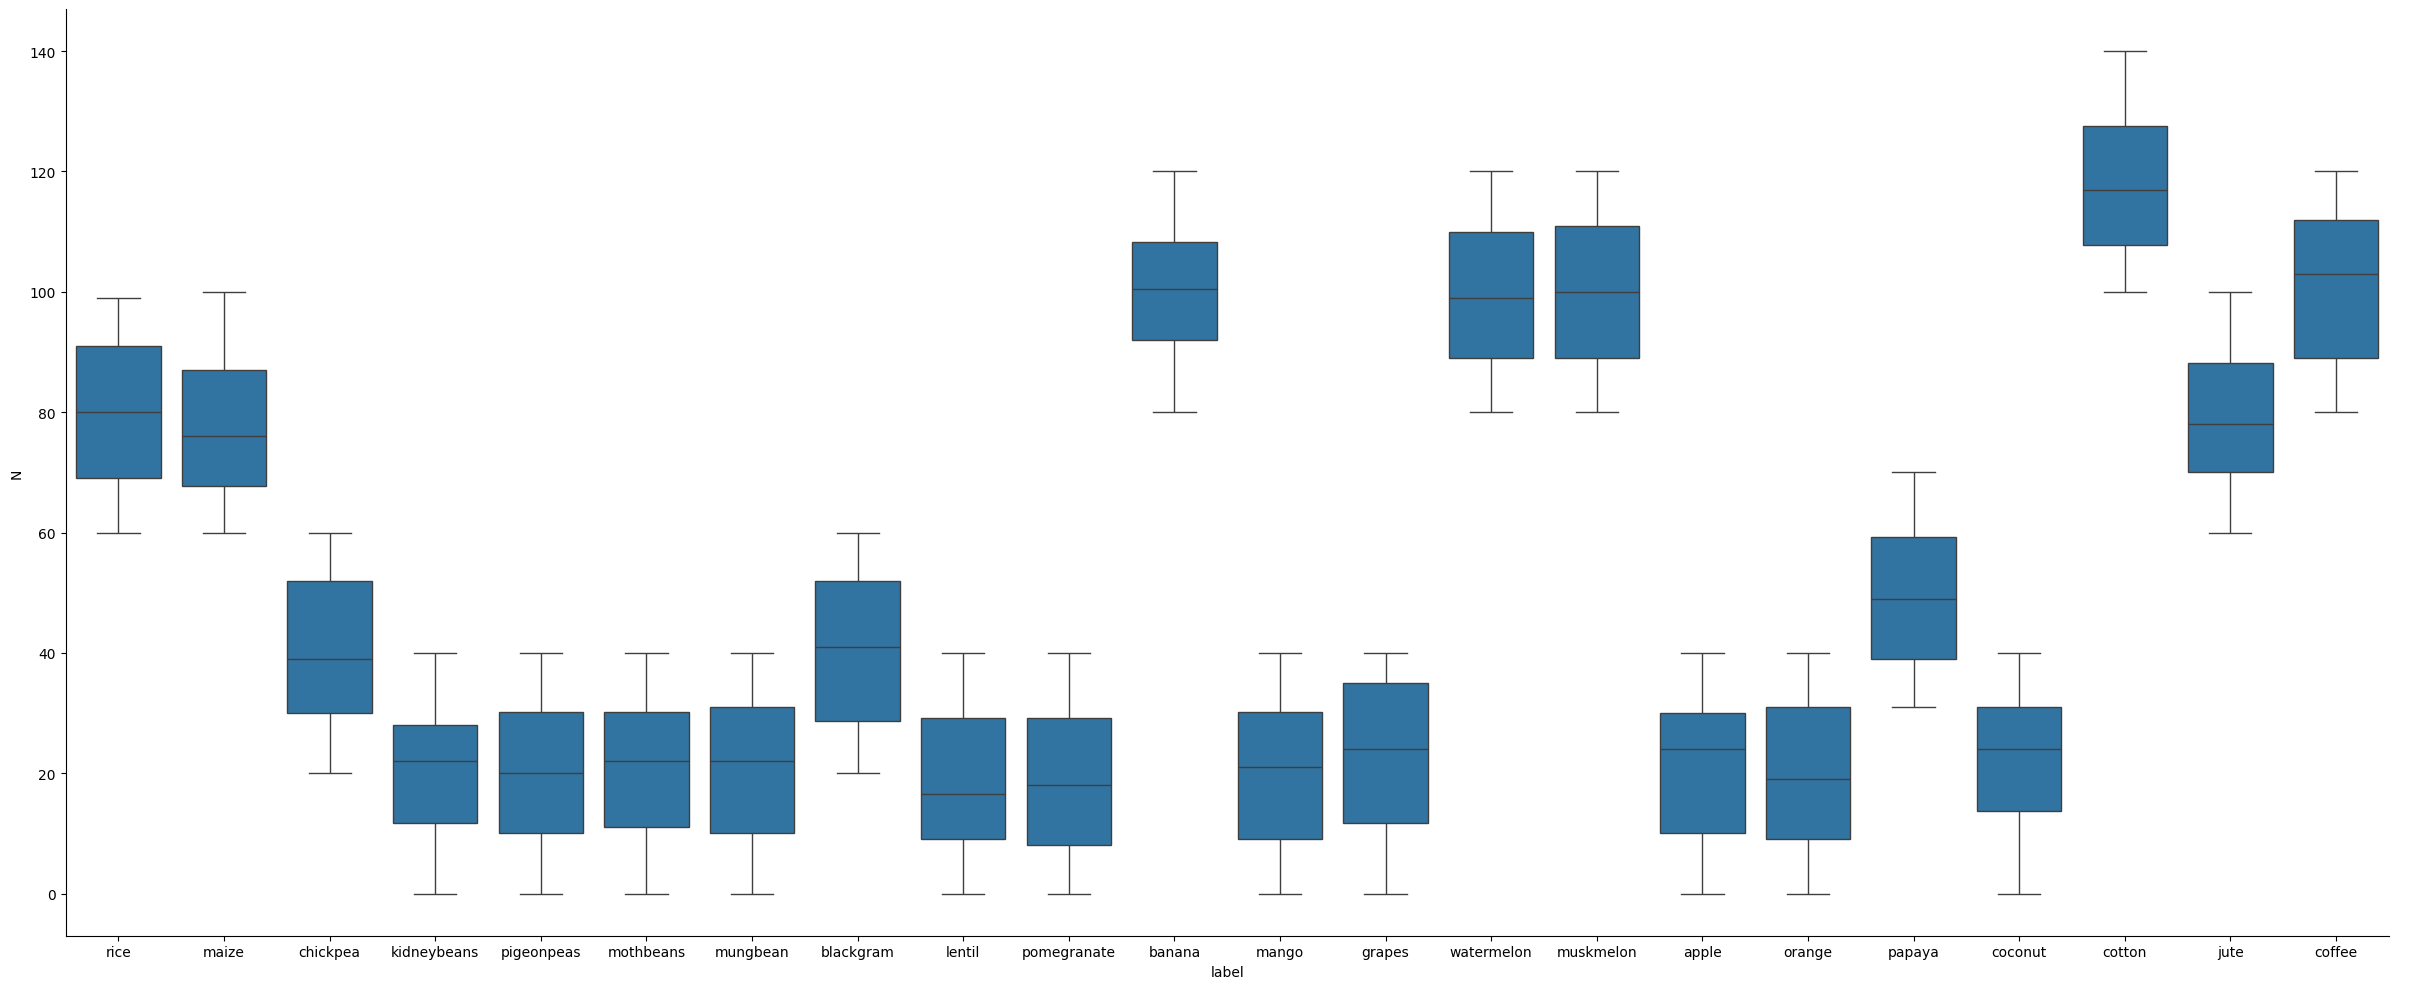

In [19]:
sns.catplot(data=df, x='label', y='N', kind='box', height=10, aspect=20/8.27)
# plt.xticks(rotation='vertical')
plt.show()

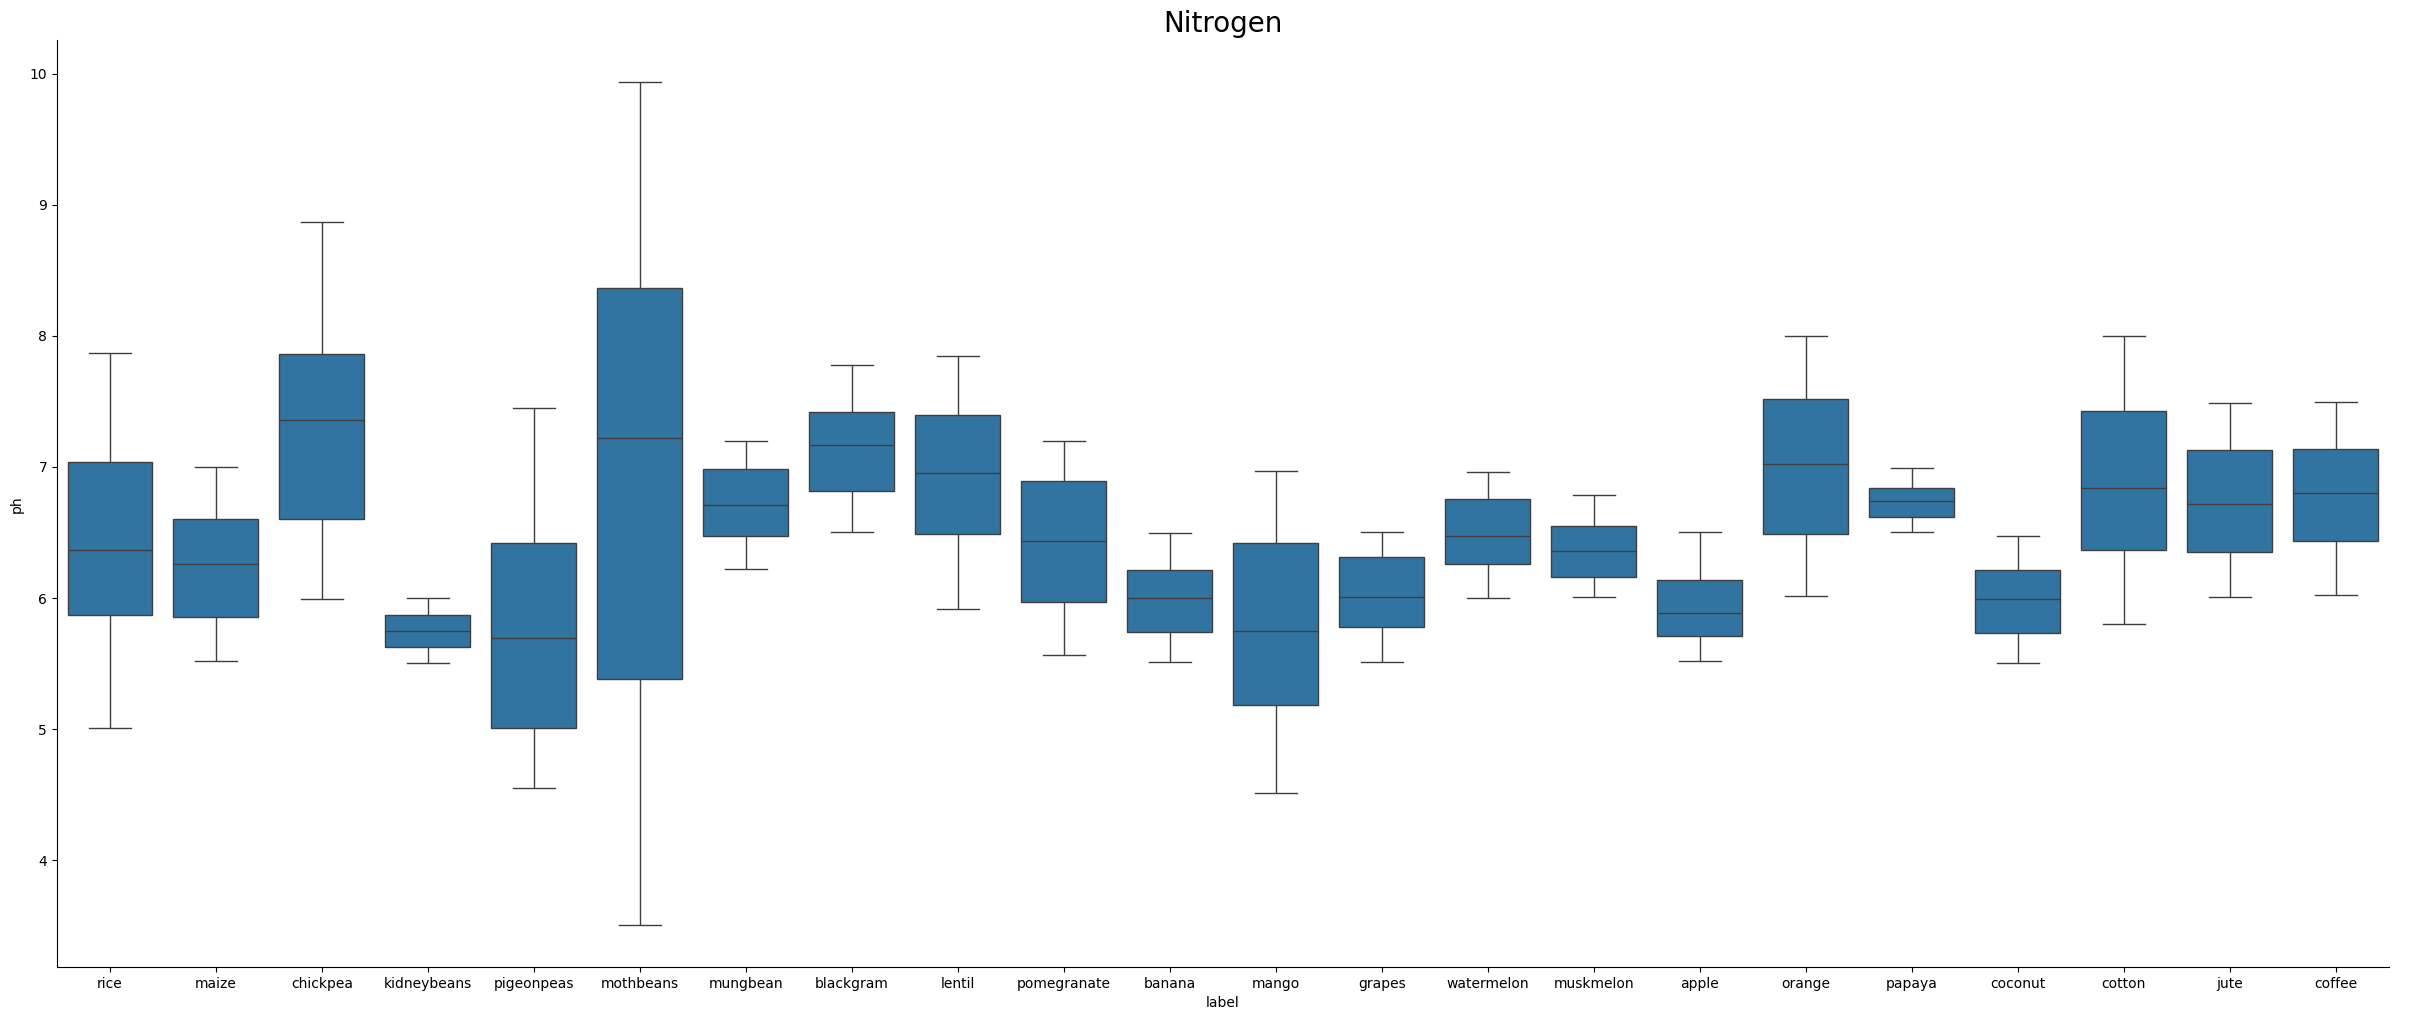

In [26]:
sns.catplot(data=df, x='label', y='ph', kind='box', height=10, aspect=20/8.27)
# plt.xticks(rotation='vertical')
plt.title("Nitrogen",size=20)
plt.show()

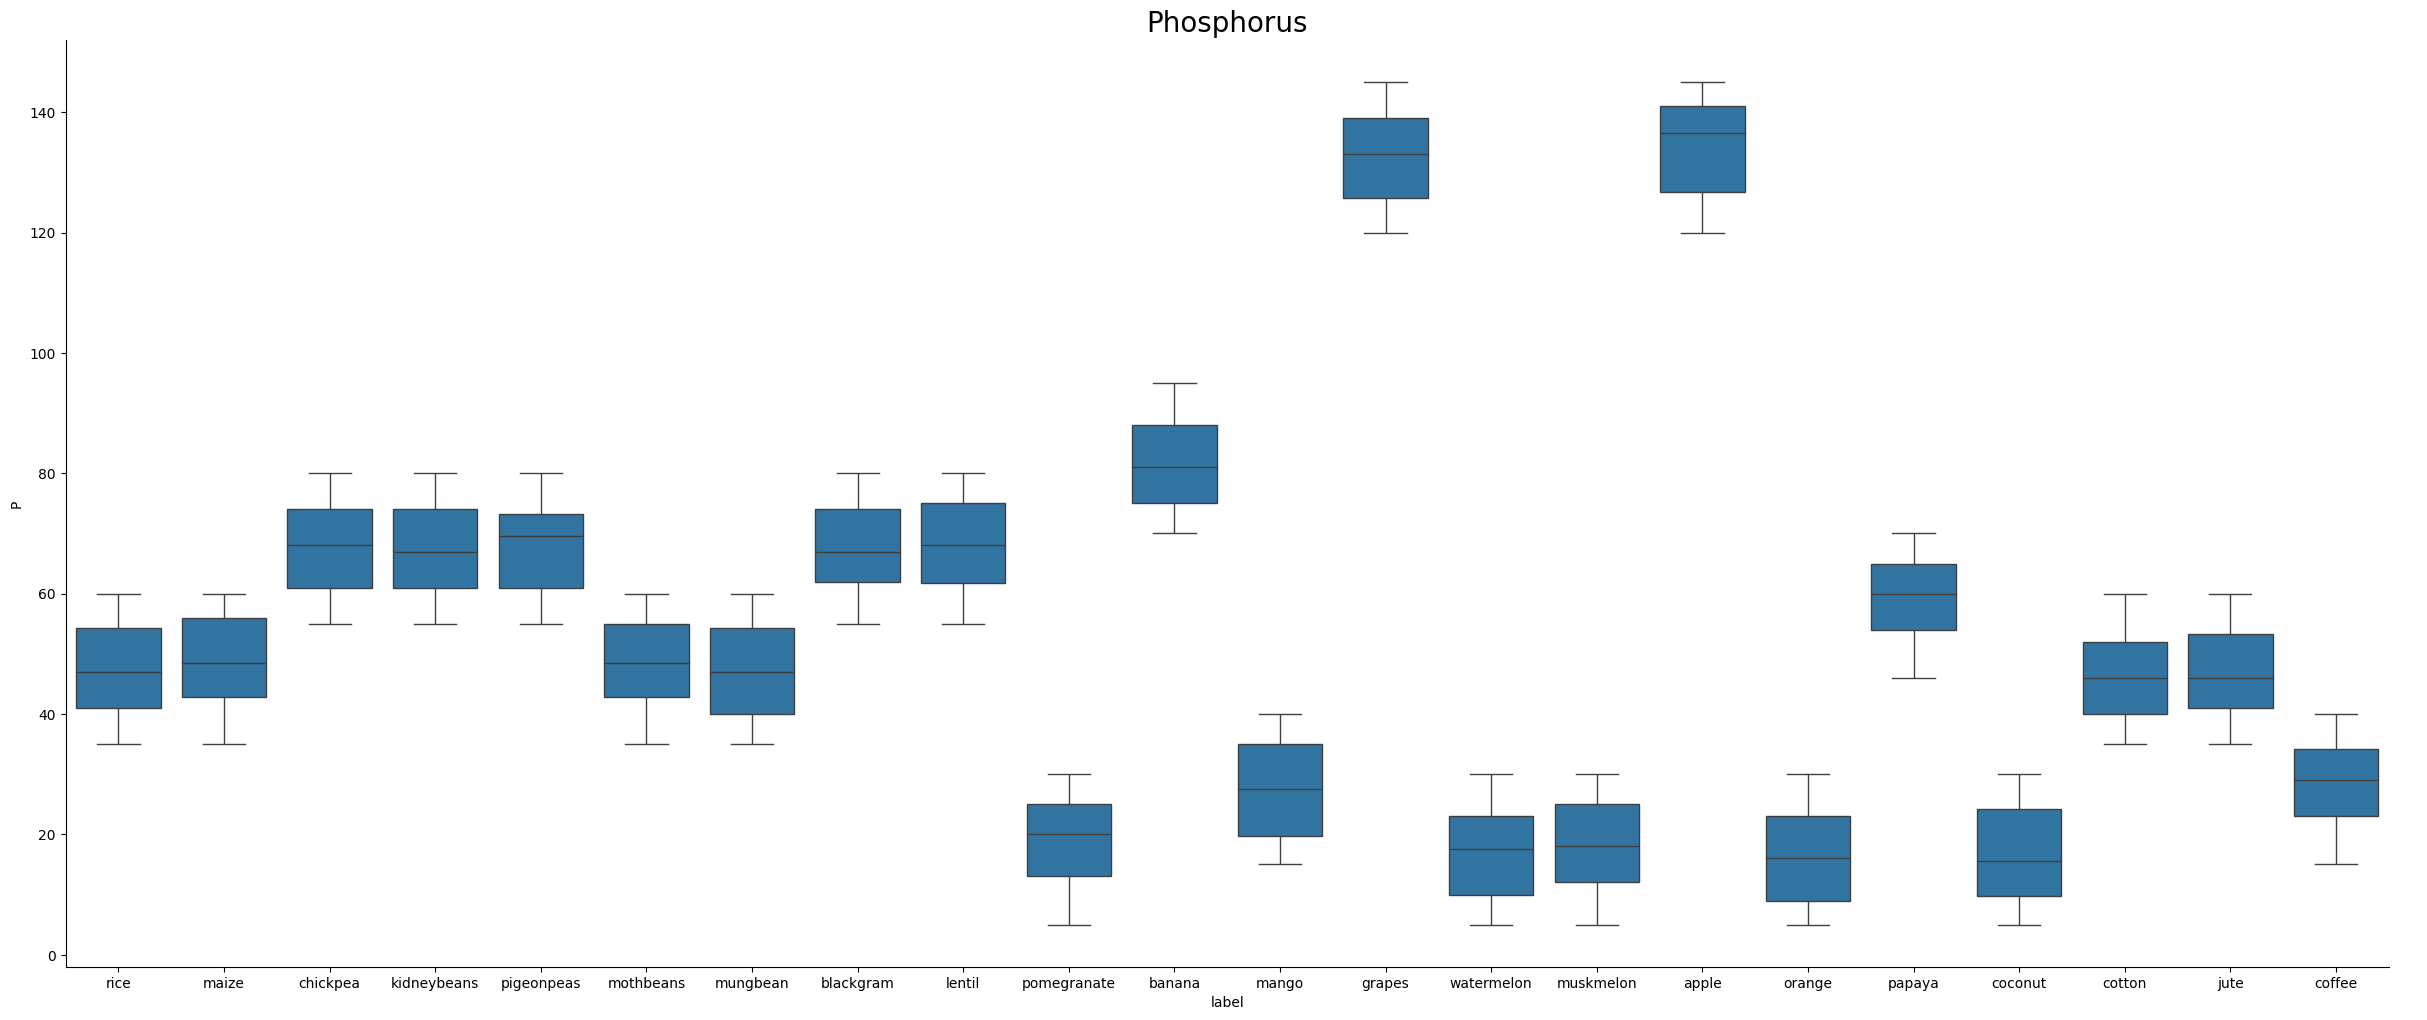

In [21]:
sns.catplot(data=df, x='label', y='P', kind='box', height=10, aspect=20/8.27)
# plt.xticks(rotation='vertical')
plt.title("Phosphorus",size=20)
plt.show()

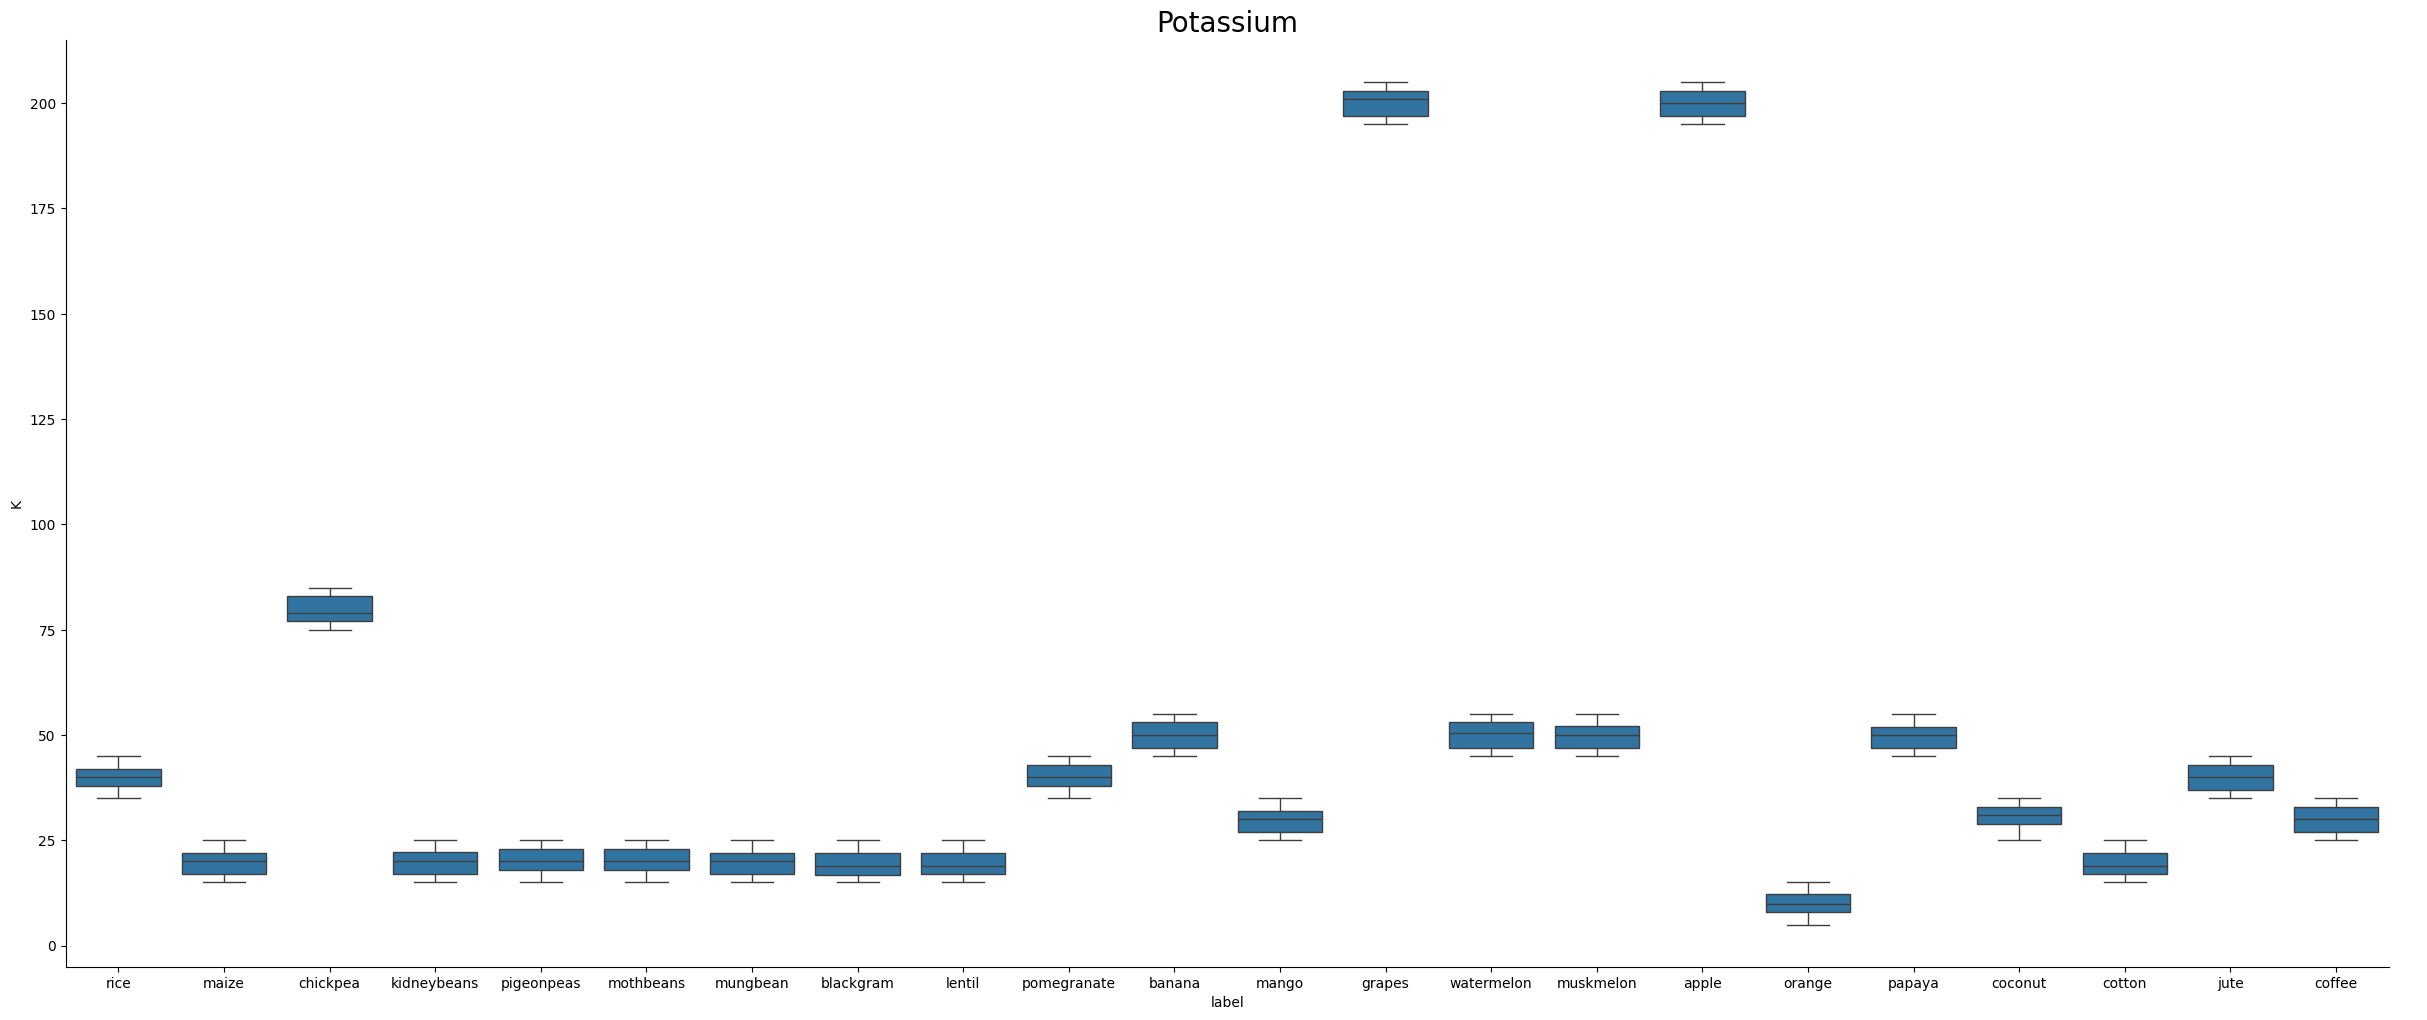

In [22]:
sns.catplot(data=df, x='label', y='K', kind='box', height=10, aspect=20/8.27)
# plt.xticks(rotation='vertical')
plt.title("Potassium",size=20)
plt.show()

PREDICTION


In [23]:
x = df.drop(['label'], axis=1)
x.head()

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340


In [25]:
y = df['label']
encode = preprocessing.LabelEncoder()
y = encode.fit_transform(y)
print("label length: ", len(y))

label length:  2200


In [28]:
x_train,x_test,y_train,y_test = train_test_split(x, y)
print(len(x_train),len(y_train),len(x_test),len(y_test))

1650 1650 550 550


BEST MODEL CHOOSING


In [36]:
a = {'decision_tree' : {
    'model' : DecisionTreeClassifier(criterion='gini'),
    'params' : {'decisiontreeclassifier__splitter':['best', 'random']}
    },
    'svm' : {
        'model' : SVC(gamma='auto', probability=True),
        'params' : {
            'svc__C': [1, 10, 100, 1000],
            'svc__kernel' : ['rbf', 'linear']
        }
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1, 5, 10]
        }
    },
    'k_classifer': {
        'model' : KNeighborsClassifier(),
        'params' : {'kneighborsclassifier__n_neighbors':[5, 10, 20, 25], 'kneighborsclassifier__weights':['uniform','distance']}
    }
    
    
}

In [37]:
score=[]
details = []
best_param = {}
for mdl,par in a.items():
    pipe = make_pipeline(preprocessing.StandardScaler(),par['model'])
    res = model_selection.GridSearchCV(pipe,par['params'],cv=5)
    res.fit(x_train,y_train)
    score.append({
        'Model name':mdl,
        'Best score':res.best_score_,
        'Best param':res.best_params_
    })
    details.append(pd.DataFrame(res.cv_results_))
    best_param[mdl]=res.best_estimator_
pd.DataFrame(score)

,Model name,Best score,Best param
0,decision_tree,0.982424,{'decisiontreeclassifier__splitter': 'best'}
1,svm,0.987879,"{'svc__C': 100, 'svc__kernel': 'rbf'}"
2,random_forest,0.992121,{'randomforestclassifier__n_estimators': 10}
3,k_classifer,0.974545,"{'kneighborsclassifier__n_neighbors': 5, 'knei..."


In [38]:
score

[{'Model name': 'decision_tree',
  'Best score': 0.9824242424242424,
  'Best param': {'decisiontreeclassifier__splitter': 'best'}},
 {'Model name': 'svm',
  'Best score': 0.9878787878787879,
  'Best param': {'svc__C': 100, 'svc__kernel': 'rbf'}},
 {'Model name': 'random_forest',
  'Best score': 0.9921212121212122,
  'Best param': {'randomforestclassifier__n_estimators': 10}},
 {'Model name': 'k_classifer',
  'Best score': 0.9745454545454546,
  'Best param': {'kneighborsclassifier__n_neighbors': 5,
   'kneighborsclassifier__weights': 'distance'}}]

In [39]:
for i in best_param.keys():
    print(f'{i} : {best_param[i].score(x_test,y_test)}')

decision_tree : 0.9890909090909091
svm : 0.98
random_forest : 0.9945454545454545
k_classifer : 0.9872727272727273


In [41]:
#Best model random forest
predicted = best_param['random_forest'].predict(x_test)
predicted

array([ 8, 15,  9,  8,  4, 10, 13,  6,  2,  6,  8, 18,  3,  0, 13, 20,  2,
        8,  0,  9, 17,  2, 20,  3, 20, 20, 18,  3,  7,  5, 13, 18, 21, 17,
        0, 20, 16,  5, 17,  0, 12, 21, 18, 10,  9,  6, 14,  4,  9, 18, 13,
       10, 19,  4,  4,  0,  9, 17,  7, 11, 12, 14,  3, 15, 13, 20,  8,  8,
       15, 12,  0,  3, 13, 19,  7, 13, 17, 15, 12,  5, 14, 21, 12, 13, 19,
        3,  2,  2,  1,  0, 15, 10, 19, 11,  6,  4,  8,  4, 16, 21, 10,  6,
       17, 17, 12, 10, 11, 20, 10,  7, 16, 21, 10, 12,  3, 11, 19,  6,  3,
        7, 12, 10,  7, 19, 16,  9,  6,  1,  5, 10,  2,  9, 17,  5,  8,  2,
        6,  1,  5, 16,  7, 18,  6,  4,  8, 10, 14,  4,  2, 19,  0,  5,  5,
       16,  3, 14,  9, 11,  1,  1, 15, 21,  7, 18, 10, 13,  0, 18, 16,  8,
        5, 10, 17,  0, 18, 15,  6,  1, 10,  8, 16,  8, 20, 20,  7, 21,  0,
       18,  5, 18, 20,  1, 13, 18, 18,  2, 14,  9,  6, 10,  4,  4,  9, 18,
       19, 10,  4,  2, 12, 12,  7, 16,  8, 13, 14, 19,  6,  9,  9,  0,  4,
        4,  1, 17, 17,  9

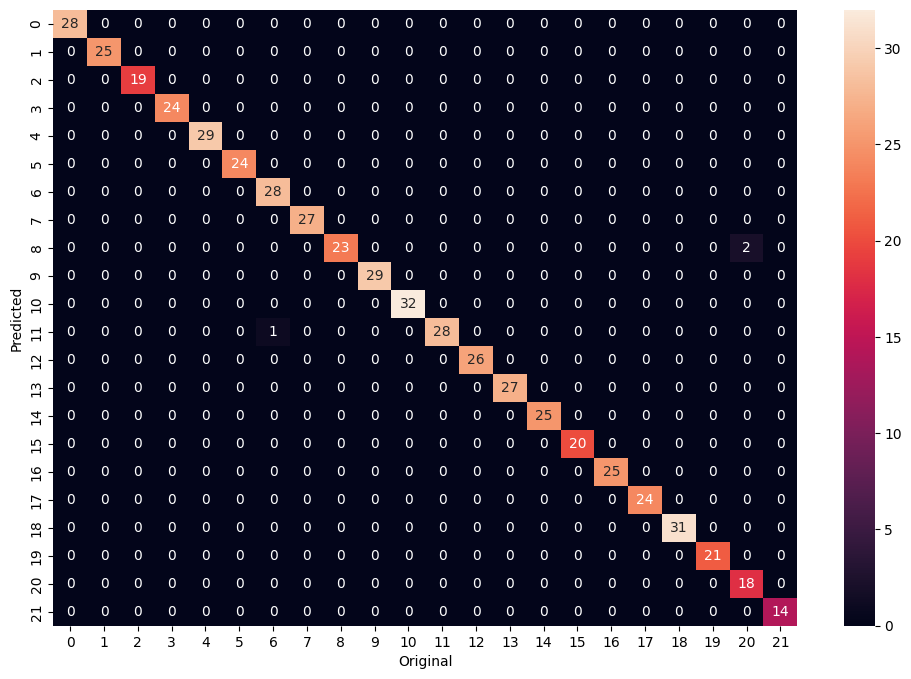

In [42]:
plt.figure(figsize=(12,8))
sns.heatmap(confusion_matrix(y_test,predicted),annot=True)
plt.xlabel("Original")
plt.ylabel("Predicted")
plt.show()

In [52]:
#bagiing classifier for more accuracy
pipe1 = make_pipeline(preprocessing.StandardScaler(),RandomForestClassifier(n_estimators = 10))
bag_model = BaggingClassifier(pipe1,n_estimators=100,oob_score=True,random_state=0,max_samples=0.8)
